1. Generating Random Points

In [68]:
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt

dict = {}
a,b = 0,0

for i in range(10000):
    a = rd.randint(1,1000)
    b = rd.randint(1,1000)
    dict[a] = b

In [24]:
len(dict)

1000

In [34]:
dic2 = {}
for i in sorted(dict):
   dic2[i]=dict[i]
print(dic2)

{1: 978, 2: 474, 3: 643, 4: 879, 5: 649, 6: 175, 7: 239, 8: 247, 9: 383, 10: 476, 11: 39, 12: 751, 13: 408, 14: 866, 15: 217, 16: 444, 17: 698, 18: 163, 19: 502, 20: 377, 21: 737, 22: 817, 23: 536, 24: 196, 25: 634, 26: 377, 27: 632, 28: 991, 29: 877, 30: 241, 31: 506, 32: 841, 33: 182, 34: 447, 35: 495, 36: 269, 37: 915, 38: 834, 39: 605, 40: 883, 41: 475, 42: 44, 43: 511, 44: 27, 45: 198, 46: 779, 47: 984, 48: 46, 49: 385, 50: 183, 51: 599, 52: 574, 53: 798, 54: 486, 55: 378, 56: 661, 57: 654, 58: 513, 59: 678, 60: 907, 61: 114, 62: 607, 63: 916, 64: 513, 65: 751, 66: 245, 67: 722, 68: 104, 69: 438, 70: 281, 71: 940, 72: 748, 73: 961, 74: 84, 75: 177, 76: 477, 77: 260, 78: 788, 79: 419, 80: 797, 81: 517, 82: 506, 83: 821, 84: 644, 85: 649, 86: 453, 87: 788, 88: 670, 89: 202, 90: 994, 91: 659, 92: 218, 93: 791, 94: 552, 95: 307, 96: 644, 97: 946, 98: 73, 99: 544, 100: 937, 101: 256, 102: 61, 103: 475, 104: 256, 105: 566, 106: 918, 107: 904, 108: 737, 109: 576, 110: 992, 111: 460, 112:

In [57]:
new = pd.DataFrame.from_dict(dic2,orient='index')
print(new)
#converting dictionary with mapped values into a dataframe.

        0
1     978
2     474
3     643
4     879
5     649
...   ...
996   318
997   607
998   601
999   164
1000  697

[1000 rows x 1 columns]


In [58]:
new['index'] = new[0].values

In [46]:
new

,0,index
1,978,978
2,474,474
3,643,643
4,879,879
5,649,649
...,...,...
996,318,318
997,607,607
998,601,601
999,164,164


In [59]:
new = new.drop(columns='index')

In [60]:
new

,0
1,978
2,474
3,643
4,879
5,649
...,...
996,318
997,607
998,601
999,164


In [61]:
new.rename(columns = {0:'y'},inplace=True)

In [62]:
new['x'] = new.index

In [63]:
new

,y,x
1,978,1
2,474,2
3,643,3
4,879,4
5,649,5
...,...,...
996,318,996
997,607,997
998,601,998
999,164,999


2. Simple Regression Model

In [64]:
# collecting x & y
X = new['x'].values
Y = new['y'].values

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [80]:
m = len(X)

# using the formula to calculate m & c
num = 0
den = 0
for i in range(m):
  num += (X[i] - mean_x) * (Y[i] - mean_y)
  den += (X[i] - mean_x) ** 2
m = num / den
c = mean_y - (m * mean_x)

print (m,c)

-0.04025200025200024 512.9321261261261


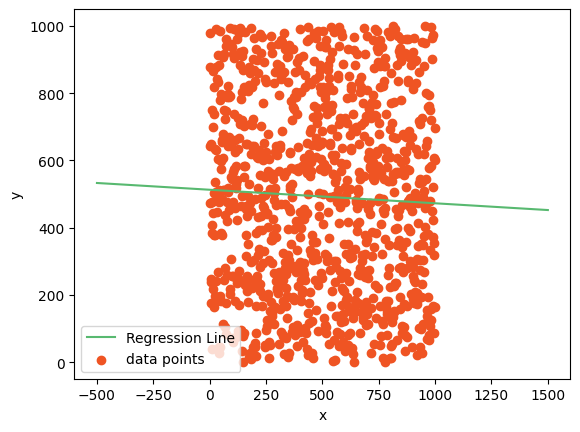

In [81]:
max_x = np.max(X) + 500
min_x = np.min(Y) - 500

# calculating line values x and y
x = np.linspace (min_x, max_x, 50)
y = c + m * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='data points')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

3. Gradient Descent 

In [86]:
m2 = 0
c2 = 0

L = 0.0001  # The learning Rate
iterations = 1000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

# Performing Gradient Descent 
for i in range(iterations): 
    Y_pred = m2*x + c2  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y- Y_pred)  # Derivative wrt c
    m2 = m2 - L * D_m  # Update m
    c2 = c2 - L * D_c  # Update c
    
print (m2, c2)

nan nan


/tmp/ipykernel_6026/1017856838.py:12: RuntimeWarning: overflow encountered in multiply
  D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
/tmp/ipykernel_6026/1017856838.py:12: RuntimeWarning: overflow encountered in scalar add
  D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
/tmp/ipykernel_6026/1017856838.py:13: RuntimeWarning: invalid value encountered in scalar add
  D_c = (-2/n) * sum(y- Y_pred)  # Derivative wrt c
/tmp/ipykernel_6026/1017856838.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  m2 = m2 - L * D_m  # Update m


4. Using sklearn

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape(m, 1)
reg = LinearRegression()
reg = reg.fit(X,Y)

Y_pred = reg.predict(X)
r2_square = reg.score(X, Y)

print (r2_square)

ModuleNotFoundError: No module named 'sklearn'